In [1]:
from google.colab import drive
import pickle
import pandas as pd
import numpy as np

drive.mount('/content/drive')

filename = '/content/drive/My Drive/TP FINAL LABORATORIO DE DATOS 2022/Datasets Kaggle/scraping_glassdoor_argentina.csv'
df = pd.read_csv(filename)
df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Unnamed: 0,Company,Position,Average Salary (ARS/month),Salary Range (ARS/month),Number of salaries informed,URL
0,0,Nielsen,Technical Analyst - Por mes,$ 96.119,Rango: $74 K - $105 K,16 sueldos,https://www.glassdoor.com.ar/Sueldos/junior-te...
1,1,Globant,Technical Manager - Por mes,$ 319.762,Rango: $167 K - $448 K,9 sueldos,https://www.glassdoor.com.ar/Sueldos/junior-te...
2,2,Avature,Technical Support Specialist - Por mes,$ 105.870,Rango: $90 K - $134 K,6 sueldos,https://www.glassdoor.com.ar/Sueldos/junior-te...
3,3,Kin + Carta,Technical Analyst - Por mes,$ 149.286,Rango: $135 K - $228 K,5 sueldos,https://www.glassdoor.com.ar/Sueldos/junior-te...
4,4,Globant,Technical Lead - Por mes,$ 166.928,Rango: $138 K - $211 K,4 sueldos,https://www.glassdoor.com.ar/Sueldos/junior-te...
...,...,...,...,...,...,...,...
4975,4975,Globant,UX Designer - Por mes,$ 131.408,Rango: $105 K - $192 K,17 sueldos,https://www.glassdoor.com.ar/Sueldos/senior-di...
4976,4976,Freelancer,Diseñador Gráfico - Por mes,$ 64.037,Rango: $30 K - $102 K,15 sueldos,https://www.glassdoor.com.ar/Sueldos/senior-di...
4977,4977,Gobierno de la Ciudad de Buenos Aires,Diseñador Gráfico - Por mes,$ 81.413,Rango: $67 K - $115 K,12 sueldos,https://www.glassdoor.com.ar/Sueldos/senior-di...
4978,4978,Diseñadora Gráfica,Diseñador Gráfico - Por mes,$ 62.043,Rango: $23 K - $102 K,11 sueldos,https://www.glassdoor.com.ar/Sueldos/senior-di...


In [2]:
df['Salary Range (ARS/month)'] = df['Salary Range (ARS/month)'].str.replace('Rango: ','')
df

,Unnamed: 0,Company,Position,Average Salary (ARS/month),Salary Range (ARS/month),Number of salaries informed,URL
0,0,Nielsen,Technical Analyst - Por mes,$ 96.119,$74 K - $105 K,16 sueldos,https://www.glassdoor.com.ar/Sueldos/junior-te...
1,1,Globant,Technical Manager - Por mes,$ 319.762,$167 K - $448 K,9 sueldos,https://www.glassdoor.com.ar/Sueldos/junior-te...
2,2,Avature,Technical Support Specialist - Por mes,$ 105.870,$90 K - $134 K,6 sueldos,https://www.glassdoor.com.ar/Sueldos/junior-te...
3,3,Kin + Carta,Technical Analyst - Por mes,$ 149.286,$135 K - $228 K,5 sueldos,https://www.glassdoor.com.ar/Sueldos/junior-te...
4,4,Globant,Technical Lead - Por mes,$ 166.928,$138 K - $211 K,4 sueldos,https://www.glassdoor.com.ar/Sueldos/junior-te...
...,...,...,...,...,...,...,...
4975,4975,Globant,UX Designer - Por mes,$ 131.408,$105 K - $192 K,17 sueldos,https://www.glassdoor.com.ar/Sueldos/senior-di...
4976,4976,Freelancer,Diseñador Gráfico - Por mes,$ 64.037,$30 K - $102 K,15 sueldos,https://www.glassdoor.com.ar/Sueldos/senior-di...
4977,4977,Gobierno de la Ciudad de Buenos Aires,Diseñador Gráfico - Por mes,$ 81.413,$67 K - $115 K,12 sueldos,https://www.glassdoor.com.ar/Sueldos/senior-di...
4978,4978,Diseñadora Gráfica,Diseñador Gráfico - Por mes,$ 62.043,$23 K - $102 K,11 sueldos,https://www.glassdoor.com.ar/Sueldos/senior-di...


In [3]:
df['Salary Range (ARS/month)'] = df['Salary Range (ARS/month)'].str.translate(str.maketrans({'K':'000','M':'000000'}))
df['Salary Range (ARS/month)'] = df['Salary Range (ARS/month)'].str.replace('$','')

df['Average Salary (ARS/month)'] = df['Average Salary (ARS/month)'].str.replace('$','')
df['Average Salary (ARS/month)'] = df['Average Salary (ARS/month)'].str.replace('.','')

df['Position'] = df['Position'].str.replace('- Por mes','')
df['Position'] = df['Position'].str.replace('Por mes','')
df['Position'] = df['Position'].str.replace('por mes','')

df['Number of salaries informed'] = df['Number of salaries informed'].str.replace(' sueldos','')


df['Position'].value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """


Sysadmin                           98
Javascript Developer               94
React Developer                    82
Data Scientist                     81
UX Designer                        80
                                   ..
.NET Developer                      1
Senior Backend Developer            1
Líder de proyecto sénior            1
Lider De Proyecto                   1
Machine Learning - Practicante      1
Name: Position, Length: 414, dtype: int64

In [4]:
df.dtypes

Unnamed: 0                      int64
Company                        object
Position                       object
Average Salary (ARS/month)     object
Salary Range (ARS/month)       object
Number of salaries informed    object
URL                            object
dtype: object

In [5]:
# Ahora, droppeo filas con valores nulos en salario y rango salarial, ya que no puedo extraer ninguna info de ellas más que la posición
df = df.dropna(axis=0, subset=['Salary Range (ARS/month)'])
df #Tenemos aproximadamente 4000 registros luego de droppear, nice

,Unnamed: 0,Company,Position,Average Salary (ARS/month),Salary Range (ARS/month),Number of salaries informed,URL
0,0,Nielsen,Technical Analyst,96119,74 000 - 105 000,16,https://www.glassdoor.com.ar/Sueldos/junior-te...
1,1,Globant,Technical Manager,319762,167 000 - 448 000,9,https://www.glassdoor.com.ar/Sueldos/junior-te...
2,2,Avature,Technical Support Specialist,105870,90 000 - 134 000,6,https://www.glassdoor.com.ar/Sueldos/junior-te...
3,3,Kin + Carta,Technical Analyst,149286,135 000 - 228 000,5,https://www.glassdoor.com.ar/Sueldos/junior-te...
4,4,Globant,Technical Lead,166928,138 000 - 211 000,4,https://www.glassdoor.com.ar/Sueldos/junior-te...
...,...,...,...,...,...,...,...
4975,4975,Globant,UX Designer,131408,105 000 - 192 000,17,https://www.glassdoor.com.ar/Sueldos/senior-di...
4976,4976,Freelancer,Diseñador Gráfico,64037,30 000 - 102 000,15,https://www.glassdoor.com.ar/Sueldos/senior-di...
4977,4977,Gobierno de la Ciudad de Buenos Aires,Diseñador Gráfico,81413,67 000 - 115 000,12,https://www.glassdoor.com.ar/Sueldos/senior-di...
4978,4978,Diseñadora Gráfica,Diseñador Gráfico,62043,23 000 - 102 000,11,https://www.glassdoor.com.ar/Sueldos/senior-di...


In [6]:
df[['Min Range (ARS/month)','Max Range (ARS/month)']] = df['Salary Range (ARS/month)'].str.split('-',expand=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [7]:
# Me deshago de esos espacios molestos. así como de la columna de rangos
df.drop(columns=['Salary Range (ARS/month)','Unnamed: 0'],inplace=True)
df['Min Range (ARS/month)'] = df['Min Range (ARS/month)'].str.extract('(\d+)', expand=False)+'000'
df['Max Range (ARS/month)'] = df['Max Range (ARS/month)'].str.extract('(\d+)', expand=False)+'000'
df['Average Salary (ARS/month)'] = df['Average Salary (ARS/month)'].str.extract('(\d+)', expand=False)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

In [8]:
# También, debo normalizar las posiciones en castellano e inglés, por lo cual, primero normalizo las dos listas que usé para hacer las búsquedas:
puestos_eng = ["Technical Leader", "Project Leader", "Project Leader","Project Manager", "Product Owner", "Data Architect", "Software Architect","Scrum Master","Machine Learning Engineer","Data Scientist","Data Engineer","Data Analyst","Database Administrator","Database Administrator","UX","Developer","Developer","SysAdmin","DevOps","IT Recruiter","QA", "Tester","Business Analyst","Consultant","Functional Analyst","Designer", "Designer",'']
puestos_esp = ["Líder técnico", "Líder de proyectos","Líder de proyecto", "Gerente de proyecto", "Propietario del producto", "Arquitecto de datos", "Arquitecto de software", "Scrum Master", "Ingeniero de aprendizaje automático", "Científico de datos", "Ingeniero de datos" , "Analista de datos", "Administrador de base de datos","Administrador de bases de datos" "UX", "Desarrollador","Programador", "SysAdmin", "DevOps", "Reclutador", "Control de calidad", "Probador", "Analista comercial", "Analista de datos", "Consultor","Analista Funcional","Diseñador",' Gráfico']

import unicodedata as ud

def normalizar_listas(puestos):
  puestos_normalizado = []
  for puesto in puestos:
    puesto = ud.normalize('NFKD', puesto.lower()).encode('ascii', errors='ignore').decode('utf-8')
    puestos_normalizado.append(puesto)
  return puestos_normalizado

puestos_eng = normalizar_listas(puestos_eng)
puestos_esp = normalizar_listas(puestos_esp)

puestos_eng

['technical leader',
 'project leader',
 'project leader',
 'project manager',
 'product owner',
 'data architect',
 'software architect',
 'scrum master',
 'machine learning engineer',
 'data scientist',
 'data engineer',
 'data analyst',
 'database administrator',
 'database administrator',
 'ux',
 'developer',
 'developer',
 'sysadmin',
 'devops',
 'it recruiter',
 'qa',
 'tester',
 'business analyst',
 'consultant',
 'functional analyst',
 'designer',
 'designer',
 '']

In [9]:
puestos_esp

['lider tecnico',
 'lider de proyectos',
 'lider de proyecto',
 'gerente de proyecto',
 'propietario del producto',
 'arquitecto de datos',
 'arquitecto de software',
 'scrum master',
 'ingeniero de aprendizaje automatico',
 'cientifico de datos',
 'ingeniero de datos',
 'analista de datos',
 'administrador de base de datos',
 'administrador de bases de datosux',
 'desarrollador',
 'programador',
 'sysadmin',
 'devops',
 'reclutador',
 'control de calidad',
 'probador',
 'analista comercial',
 'analista de datos',
 'consultor',
 'analista funcional',
 'disenador',
 ' grafico']

In [10]:
# Ahora lowercaseo todas las columnas que pueda y elimino tildes y demás (normalizo en el dataframe):
df['Company'] = df['Company'].str.lower().str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
df['Position'] = df['Position'].str.lower().str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')

# Ahora sí, traduzco nombres de puestos en español a inglés para poder uniformizar mis datos:
def uniformizar(x,column,lista_esp,lista_eng):
  for i in range(len(lista_esp)):
    try:
      #x.loc[x[column].str.contains(lista_esp[i]), column] = lista_eng[i]
      x[column] = x[column].str.replace(lista_esp[i],lista_eng[i])
    except:
      pass
  return x[column]

df['Position']=uniformizar(df,'Position',puestos_esp,puestos_eng)
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

,Company,Position,Average Salary (ARS/month),Number of salaries informed,URL,Min Range (ARS/month),Max Range (ARS/month)
0,nielsen,technical analyst,96119,16,https://www.glassdoor.com.ar/Sueldos/junior-te...,74000,105000
1,globant,technical manager,319762,9,https://www.glassdoor.com.ar/Sueldos/junior-te...,167000,448000
2,avature,technical support specialist,105870,6,https://www.glassdoor.com.ar/Sueldos/junior-te...,90000,134000
3,kin + carta,technical analyst,149286,5,https://www.glassdoor.com.ar/Sueldos/junior-te...,135000,228000
4,globant,technical lead,166928,4,https://www.glassdoor.com.ar/Sueldos/junior-te...,138000,211000
...,...,...,...,...,...,...,...
4975,globant,ux designer,131408,17,https://www.glassdoor.com.ar/Sueldos/senior-di...,105000,192000
4976,freelancer,designerdesigner,64037,15,https://www.glassdoor.com.ar/Sueldos/senior-di...,30000,102000
4977,gobierno de la ciudad de buenos aires,designerdesigner,81413,12,https://www.glassdoor.com.ar/Sueldos/senior-di...,67000,115000
4978,disenadora grafica,designerdesigner,62043,11,https://www.glassdoor.com.ar/Sueldos/senior-di...,23000,102000


In [11]:
df['Position'] = df['Position'].str.replace('designerdesigner','designer')
df['Position'] = df['Position'].str.replace('propietario','product owner')

# Normalizo la columna Position en base a seniority
df['Position'] = df['Position'].str.replace('junior','jr')
df['Position'] = df['Position'].str.replace('senior','sr')

# Convierto columnas numéricas a int:
df['Min Range (ARS/month)'] = pd.to_numeric(df['Min Range (ARS/month)'])
df['Max Range (ARS/month)'] = pd.to_numeric(df['Max Range (ARS/month)'])
df['Average Salary (ARS/month)'] = pd.to_numeric(df['Average Salary (ARS/month)'])
df['Number of salaries informed'] = pd.to_numeric(df['Number of salaries informed'])

#Reordeno columnas:
df = df[['Company', 'Position', 'Min Range (ARS/month)', 'Average Salary (ARS/month)','Max Range (ARS/month)','Number of salaries informed','URL']]

#Finalmente, convierto a numérico los datos sobre remuneraciones y número de salarios:
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

,Company,Position,Min Range (ARS/month),Average Salary (ARS/month),Max Range (ARS/month),Number of salaries informed,URL
0,nielsen,technical analyst,74000,96119.0,105000,16,https://www.glassdoor.com.ar/Sueldos/junior-te...
1,globant,technical manager,167000,319762.0,448000,9,https://www.glassdoor.com.ar/Sueldos/junior-te...
2,avature,technical support specialist,90000,105870.0,134000,6,https://www.glassdoor.com.ar/Sueldos/junior-te...
3,kin + carta,technical analyst,135000,149286.0,228000,5,https://www.glassdoor.com.ar/Sueldos/junior-te...
4,globant,technical lead,138000,166928.0,211000,4,https://www.glassdoor.com.ar/Sueldos/junior-te...
...,...,...,...,...,...,...,...
4975,globant,ux designer,105000,131408.0,192000,17,https://www.glassdoor.com.ar/Sueldos/senior-di...
4976,freelancer,designer,30000,64037.0,102000,15,https://www.glassdoor.com.ar/Sueldos/senior-di...
4977,gobierno de la ciudad de buenos aires,designer,67000,81413.0,115000,12,https://www.glassdoor.com.ar/Sueldos/senior-di...
4978,disenadora grafica,designer,23000,62043.0,102000,11,https://www.glassdoor.com.ar/Sueldos/senior-di...


In [12]:
df = df[df['Position'].str.contains("por hora|contratista|practicante")==False] #Droppeo aquellas filas cuyas posiciones tienen medido su sueldo a algo distinto a sueldo por mes
df = df.dropna(axis=0, subset=['Min Range (ARS/month)','Max Range (ARS/month)']) #Droppeo aquellas filas que tienen valores nulos en los extremos del rango salarial ya que no puedo sacar ninguna info de ellas.
df['Position'].value_counts()

developer                118
data scientist            95
javascript developer      94
react developer           82
ux designer               80
                        ... 
project leader jr          1
machine learning           1
jr data scientist          1
technical leader sr        1
designer industrial        1
Name: Position, Length: 301, dtype: int64

In [13]:
df.shape

(3955, 7)

In [14]:
df

,Company,Position,Min Range (ARS/month),Average Salary (ARS/month),Max Range (ARS/month),Number of salaries informed,URL
0,nielsen,technical analyst,74000,96119.0,105000,16,https://www.glassdoor.com.ar/Sueldos/junior-te...
1,globant,technical manager,167000,319762.0,448000,9,https://www.glassdoor.com.ar/Sueldos/junior-te...
2,avature,technical support specialist,90000,105870.0,134000,6,https://www.glassdoor.com.ar/Sueldos/junior-te...
3,kin + carta,technical analyst,135000,149286.0,228000,5,https://www.glassdoor.com.ar/Sueldos/junior-te...
4,globant,technical lead,138000,166928.0,211000,4,https://www.glassdoor.com.ar/Sueldos/junior-te...
...,...,...,...,...,...,...,...
4975,globant,ux designer,105000,131408.0,192000,17,https://www.glassdoor.com.ar/Sueldos/senior-di...
4976,freelancer,designer,30000,64037.0,102000,15,https://www.glassdoor.com.ar/Sueldos/senior-di...
4977,gobierno de la ciudad de buenos aires,designer,67000,81413.0,115000,12,https://www.glassdoor.com.ar/Sueldos/senior-di...
4978,disenadora grafica,designer,23000,62043.0,102000,11,https://www.glassdoor.com.ar/Sueldos/senior-di...


In [15]:
df.dtypes

Company                         object
Position                        object
Min Range (ARS/month)            int64
Average Salary (ARS/month)     float64
Max Range (ARS/month)            int64
Number of salaries informed      int64
URL                             object
dtype: object

In [16]:
# Vemos que hay variantes de nombre para una misma compania:
df['Company'] = df['Company'].str.replace('mercado livre','mercado libre')
df['Company'] = df['Company'].str.replace('mercadolibre','mercado libre')
df['Company'] = df['Company'].str.replace('mercado','mercado libre')
df['Company'] = df['Company'].str.replace('mercado libre libre','mercado libre')
df['Company'] = df['Company'].str.replace('independiente','freelance')
df['Company'] = df['Company'].str.replace('freelancer','freelance')
df['Company'] = df['Company'].str.replace('jpmorgan chase & co','j.p. morgan')
df['Company'] = df['Company'].str.replace('naranja x','naranja')
df['Company'] = df['Company'].str.replace('santander rio','santander')
df['Company'] = df['Company'].str.replace('santander tecnologia e inovacao','santander')
df['Company'].value_counts()

globant             297
accenture           208
mercado libre       161
freelance           133
ibm                 124
                   ... 
sms global            1
unempleadormas        1
banco de cordoba      1
integramedia          1
paramount             1
Name: Company, Length: 789, dtype: int64

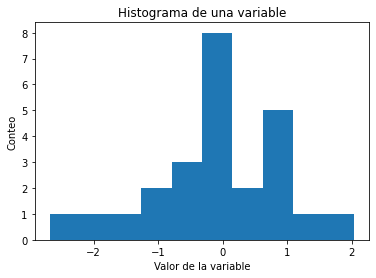

In [17]:
# El propósito de esto es demostrar que cuando vayamos a tomar el top 20 de las empresas con más reportes, podemos asumir una distribución normal de los sueldos.
# Asumiendo distribución normal, el cálculo de los sueldos promedio de cada empresa puede hacerse con (min_rango+max_rango)/2, y al ser dist normal, la media se corresponde con la moda y la mediana

from numpy.random import randn
import matplotlib.pyplot as plt
# Genero 25 muestras
distribucion_generada = randn(25)
# Represento el histograma
plt.hist(distribucion_generada)
plt.title('Histograma de una variable')
plt.xlabel('Valor de la variable')
plt.ylabel('Conteo')
plt.show()

In [18]:
#Para hacer la clasificación de seniorities, me basaré en el siguiente estudio: https://sueldos.openqube.io/encuesta-sueldos-2022.01/
## Consideraremos Jr: 0 a 2 años de exp y sueldo menor a un umbarl
## Ssr: 2 a 4 años de exp, consideramos como tales a quienes no tienen ningún tag en su nombre de puesto
## Sr: 4+ años de exp


df['Seniority'] = ""

def agrega_sen (x):
  if "junior" in x:
    return 'Junior (0 a 2 años de exp)'
  elif "senior" in x:
    return 'Senior (4+ años de exp)'
  else:
    return 'Semisenior (2 a 4 años de exp)'

df["Seniority"] = df["URL"].apply(agrega_sen)
df

,Company,Position,Min Range (ARS/month),Average Salary (ARS/month),Max Range (ARS/month),Number of salaries informed,URL,Seniority
0,nielsen,technical analyst,74000,96119.0,105000,16,https://www.glassdoor.com.ar/Sueldos/junior-te...,Junior (0 a 2 años de exp)
1,globant,technical manager,167000,319762.0,448000,9,https://www.glassdoor.com.ar/Sueldos/junior-te...,Junior (0 a 2 años de exp)
2,avature,technical support specialist,90000,105870.0,134000,6,https://www.glassdoor.com.ar/Sueldos/junior-te...,Junior (0 a 2 años de exp)
3,kin + carta,technical analyst,135000,149286.0,228000,5,https://www.glassdoor.com.ar/Sueldos/junior-te...,Junior (0 a 2 años de exp)
4,globant,technical lead,138000,166928.0,211000,4,https://www.glassdoor.com.ar/Sueldos/junior-te...,Junior (0 a 2 años de exp)
...,...,...,...,...,...,...,...,...
4975,globant,ux designer,105000,131408.0,192000,17,https://www.glassdoor.com.ar/Sueldos/senior-di...,Senior (4+ años de exp)
4976,freelance,designer,30000,64037.0,102000,15,https://www.glassdoor.com.ar/Sueldos/senior-di...,Senior (4+ años de exp)
4977,gobierno de la ciudad de buenos aires,designer,67000,81413.0,115000,12,https://www.glassdoor.com.ar/Sueldos/senior-di...,Senior (4+ años de exp)
4978,disenadora grafica,designer,23000,62043.0,102000,11,https://www.glassdoor.com.ar/Sueldos/senior-di...,Senior (4+ años de exp)


In [19]:
df["Seniority"].value_counts()

Senior (4+ años de exp)           1330
Semisenior (2 a 4 años de exp)    1326
Junior (0 a 2 años de exp)        1299
Name: Seniority, dtype: int64

In [20]:
df_nan = df[df['Average Salary (ARS/month)'].isna()]
ind = df_nan.index
ind

Int64Index([  10,   11,   12,   14,   15,   16,   17,   18,   19,   34,
            ...
            4962, 4963, 4964, 4965, 4966, 4967, 4968, 4969, 4970, 4971],
           dtype='int64', length=2345)

In [21]:
df.loc[ind,'Average Salary (ARS/month)'] = (df.loc[ind,"Max Range (ARS/month)"] + df.loc[ind,"Min Range (ARS/month)"]) / 2

In [22]:
df

,Company,Position,Min Range (ARS/month),Average Salary (ARS/month),Max Range (ARS/month),Number of salaries informed,URL,Seniority
0,nielsen,technical analyst,74000,96119.0,105000,16,https://www.glassdoor.com.ar/Sueldos/junior-te...,Junior (0 a 2 años de exp)
1,globant,technical manager,167000,319762.0,448000,9,https://www.glassdoor.com.ar/Sueldos/junior-te...,Junior (0 a 2 años de exp)
2,avature,technical support specialist,90000,105870.0,134000,6,https://www.glassdoor.com.ar/Sueldos/junior-te...,Junior (0 a 2 años de exp)
3,kin + carta,technical analyst,135000,149286.0,228000,5,https://www.glassdoor.com.ar/Sueldos/junior-te...,Junior (0 a 2 años de exp)
4,globant,technical lead,138000,166928.0,211000,4,https://www.glassdoor.com.ar/Sueldos/junior-te...,Junior (0 a 2 años de exp)
...,...,...,...,...,...,...,...,...
4975,globant,ux designer,105000,131408.0,192000,17,https://www.glassdoor.com.ar/Sueldos/senior-di...,Senior (4+ años de exp)
4976,freelance,designer,30000,64037.0,102000,15,https://www.glassdoor.com.ar/Sueldos/senior-di...,Senior (4+ años de exp)
4977,gobierno de la ciudad de buenos aires,designer,67000,81413.0,115000,12,https://www.glassdoor.com.ar/Sueldos/senior-di...,Senior (4+ años de exp)
4978,disenadora grafica,designer,23000,62043.0,102000,11,https://www.glassdoor.com.ar/Sueldos/senior-di...,Senior (4+ años de exp)


In [23]:
df.sort_values("Average Salary (ARS/month)", ascending = False)

,Company,Position,Min Range (ARS/month),Average Salary (ARS/month),Max Range (ARS/month),Number of salaries informed,URL,Seniority
2626,sap,sr project manager,5000,5457377.0,7000,3,https://www.glassdoor.com.ar/Sueldos/senior-ge...,Senior (4+ años de exp)
165,sap,sr project manager,5000,5457377.0,7000,3,https://www.glassdoor.com.ar/Sueldos/senior-pr...,Senior (4+ años de exp)
2312,bain & company,consultant,559000,4486891.0,5000,3,https://www.glassdoor.com.ar/Sueldos/consultan...,Semisenior (2 a 4 años de exp)
4552,techint,devops,870000,904500.0,939000,1,https://www.glassdoor.com.ar/Sueldos/senior-re...,Senior (4+ años de exp)
4510,techint,devops,864000,903500.0,943000,1,https://www.glassdoor.com.ar/Sueldos/junior-re...,Junior (0 a 2 años de exp)
...,...,...,...,...,...,...,...,...
3429,santander,cobol developer,1000,1000.0,1000,1,https://www.glassdoor.com.ar/Sueldos/junior-de...,Junior (0 a 2 años de exp)
615,emi labs,jr data analyst,1000,1000.0,1000,1,https://www.glassdoor.com.ar/Sueldos/junior-da...,Junior (0 a 2 años de exp)
1009,santander,cobol developer,1000,1000.0,1000,1,https://www.glassdoor.com.ar/Sueldos/senior-co...,Senior (4+ años de exp)
3297,departamento general de irrigacion,javascript developer,1000,1000.0,1000,1,https://www.glassdoor.com.ar/Sueldos/senior-de...,Senior (4+ años de exp)


In [24]:
df.loc[4552]["URL"]

'https://www.glassdoor.com.ar/Sueldos/senior-reclutador-de-ti-sueldo-SRCH_KO0,23.htm?clickSource=searchBtn'

In [25]:
#q hacer con los nan en promedio de salario? reemplazo por el promedio de max min?
#q hacer con los salarios de 5 millones? es por año o es basura?
#como combinar el de usa con el de forbes para poder agrupar las empresas
#ml y ml brasil, separado o juntos?
#si pasamos los salarios de arg a dolares, oficial o blue?

# Removamos los datos considerados "ruido":
# Es decir: Salarios de menos de 60k, o salarios extremadamente altos (más de 675k, que es lo que observé y me pareció lógico), salarios de menos de 100k para Semiseniors y de 130k Seniors y salarios de más de 250k para juniors
df = df.loc[ (df['Average Salary (ARS/month)'] > 60000) ]
df = df.loc[ (df['Average Salary (ARS/month)'] <= 675000) ]

df = df.loc[~( (df['Average Salary (ARS/month)'] <= 100000) & (df['Seniority'] == 'Semisenior (2 a 4 años de exp)') )]
df = df.loc[~( (df['Average Salary (ARS/month)'] <= 130000) & (df['Seniority']=='Senior (4+ años de exp)') )]
df = df.loc[~( (df['Average Salary (ARS/month)'] >= 250000) & (df['Seniority'] == 'Junior (0 a 2 años de exp)') )]

df.reset_index(inplace=True, drop=True)
df

,Company,Position,Min Range (ARS/month),Average Salary (ARS/month),Max Range (ARS/month),Number of salaries informed,URL,Seniority
0,nielsen,technical analyst,74000,96119.0,105000,16,https://www.glassdoor.com.ar/Sueldos/junior-te...,Junior (0 a 2 años de exp)
1,avature,technical support specialist,90000,105870.0,134000,6,https://www.glassdoor.com.ar/Sueldos/junior-te...,Junior (0 a 2 años de exp)
2,kin + carta,technical analyst,135000,149286.0,228000,5,https://www.glassdoor.com.ar/Sueldos/junior-te...,Junior (0 a 2 años de exp)
3,globant,technical lead,138000,166928.0,211000,4,https://www.glassdoor.com.ar/Sueldos/junior-te...,Junior (0 a 2 años de exp)
4,globallogic,technical lead,214000,238677.0,286000,4,https://www.glassdoor.com.ar/Sueldos/junior-te...,Junior (0 a 2 años de exp)
...,...,...,...,...,...,...,...,...
3080,grupo gea,designer sr,200000,208500.0,217000,1,https://www.glassdoor.com.ar/Sueldos/senior-di...,Senior (4+ años de exp)
3081,hexacta,designer sr,164000,171000.0,178000,1,https://www.glassdoor.com.ar/Sueldos/senior-di...,Senior (4+ años de exp)
3082,don (argentina),designer sr,136000,141500.0,147000,1,https://www.glassdoor.com.ar/Sueldos/senior-di...,Senior (4+ años de exp)
3083,paramount,designer sr,198000,204500.0,211000,1,https://www.glassdoor.com.ar/Sueldos/senior-di...,Senior (4+ años de exp)


In [26]:
# Pasemos a dólares las columnas de sueldos:
valor_dolar_blue = 238
df['Min Range (USD/month)'] = df['Min Range (ARS/month)'] / valor_dolar_blue
df['Average Salary (USD/month)'] = df['Average Salary (ARS/month)'] / valor_dolar_blue
df['Max Range (USD/month)'] = df['Max Range (ARS/month)'] / valor_dolar_blue
df['Annual average salary (USD/year) (without bonuses and compensations)'] = df['Average Salary (USD/month)']*12
df

,Company,Position,Min Range (ARS/month),Average Salary (ARS/month),Max Range (ARS/month),Number of salaries informed,URL,Seniority,Min Range (USD/month),Average Salary (USD/month),Max Range (USD/month),Annual average salary (USD/year) (without bonuses and compensations)
0,nielsen,technical analyst,74000,96119.0,105000,16,https://www.glassdoor.com.ar/Sueldos/junior-te...,Junior (0 a 2 años de exp),310.924370,403.861345,441.176471,4846.336134
1,avature,technical support specialist,90000,105870.0,134000,6,https://www.glassdoor.com.ar/Sueldos/junior-te...,Junior (0 a 2 años de exp),378.151261,444.831933,563.025210,5337.983193
2,kin + carta,technical analyst,135000,149286.0,228000,5,https://www.glassdoor.com.ar/Sueldos/junior-te...,Junior (0 a 2 años de exp),567.226891,627.252101,957.983193,7527.025210
3,globant,technical lead,138000,166928.0,211000,4,https://www.glassdoor.com.ar/Sueldos/junior-te...,Junior (0 a 2 años de exp),579.831933,701.378151,886.554622,8416.537815
4,globallogic,technical lead,214000,238677.0,286000,4,https://www.glassdoor.com.ar/Sueldos/junior-te...,Junior (0 a 2 años de exp),899.159664,1002.844538,1201.680672,12034.134454
...,...,...,...,...,...,...,...,...,...,...,...,...
3080,grupo gea,designer sr,200000,208500.0,217000,1,https://www.glassdoor.com.ar/Sueldos/senior-di...,Senior (4+ años de exp),840.336134,876.050420,911.764706,10512.605042
3081,hexacta,designer sr,164000,171000.0,178000,1,https://www.glassdoor.com.ar/Sueldos/senior-di...,Senior (4+ años de exp),689.075630,718.487395,747.899160,8621.848739
3082,don (argentina),designer sr,136000,141500.0,147000,1,https://www.glassdoor.com.ar/Sueldos/senior-di...,Senior (4+ años de exp),571.428571,594.537815,617.647059,7134.453782
3083,paramount,designer sr,198000,204500.0,211000,1,https://www.glassdoor.com.ar/Sueldos/senior-di...,Senior (4+ años de exp),831.932773,859.243697,886.554622,10310.924370


In [27]:
# Ahora que ya tengo el seniority en la columna del mismo nombre, puedo normalizar la columna de puestos y quitarles el "jr" o "sr"
df['Position'] = df['Position'].str.replace('jr','')
df['Position'] = df['Position'].str.replace('sr','')

df = df[['Company', 'Position', 'Min Range (ARS/month)', 'Average Salary (ARS/month)','Max Range (ARS/month)','Number of salaries informed','Min Range (USD/month)', 'Average Salary (USD/month)','Max Range (USD/month)','Annual average salary (USD/year) (without bonuses and compensations)','Seniority','URL']]

df = df.sort_values("Average Salary (ARS/month)", ascending = False)
df.drop_duplicates(subset=None, keep='first', inplace=True, ignore_index=False)
df.reset_index(inplace=True, drop=True)
df

,Company,Position,Min Range (ARS/month),Average Salary (ARS/month),Max Range (ARS/month),Number of salaries informed,Min Range (USD/month),Average Salary (USD/month),Max Range (USD/month),Annual average salary (USD/year) (without bonuses and compensations),Seniority,URL
0,naranja,java developer,638000,663500.0,689000,1,2680.672269,2787.815126,2894.957983,33453.781513,Senior (4+ años de exp),https://www.glassdoor.com.ar/Sueldos/senior-ja...
1,google,python developer,632000,656500.0,681000,1,2655.462185,2758.403361,2861.344538,33100.840336,Semisenior (2 a 4 años de exp),https://www.glassdoor.com.ar/Sueldos/python-de...
2,ey,software architect,626000,653000.0,680000,1,2630.252101,2743.697479,2857.142857,32924.369748,Semisenior (2 a 4 años de exp),https://www.glassdoor.com.ar/Sueldos/software-...
3,mercado libre,project leader,609000,633500.0,658000,1,2558.823529,2661.764706,2764.705882,31941.176471,Senior (4+ años de exp),https://www.glassdoor.com.ar/Sueldos/senior-pr...
4,rappi,machine learning engineer,595000,621000.0,647000,1,2500.000000,2609.243697,2718.487395,31310.924370,Senior (4+ años de exp),https://www.glassdoor.com.ar/Sueldos/senior-ma...
...,...,...,...,...,...,...,...,...,...,...,...,...
2931,amalgama,backend developer,59000,61500.0,64000,1,247.899160,258.403361,268.907563,3100.840336,Junior (0 a 2 años de exp),https://www.glassdoor.com.ar/Sueldos/junior-de...
2932,universidad nacional de la plata,frontend developer,59000,61500.0,64000,1,247.899160,258.403361,268.907563,3100.840336,Junior (0 a 2 años de exp),https://www.glassdoor.com.ar/Sueldos/junior-fr...
2933,amalgama,backend developer,59000,61500.0,64000,1,247.899160,258.403361,268.907563,3100.840336,Junior (0 a 2 años de exp),https://www.glassdoor.com.ar/Sueldos/junior-ba...
2934,bekaertdeslee,fullstack developer,58000,60500.0,63000,1,243.697479,254.201681,264.705882,3050.420168,Junior (0 a 2 años de exp),https://www.glassdoor.com.ar/Sueldos/junior-fu...


In [28]:
df["Seniority"].value_counts()

Semisenior (2 a 4 años de exp)    1012
Junior (0 a 2 años de exp)        1006
Senior (4+ años de exp)            918
Name: Seniority, dtype: int64

In [29]:
df['Position'].value_counts()

developer                83
data scientist           79
react developer          70
javascript developer     68
technical leader         56
                         ..
php developer             1
ux .net semi              1
project leader            1
web ui developer          1
.net developer            1
Name: Position, Length: 240, dtype: int64

In [30]:
aux = df[df['Position'].str.contains('design')]
aux

,Company,Position,Min Range (ARS/month),Average Salary (ARS/month),Max Range (ARS/month),Number of salaries informed,Min Range (USD/month),Average Salary (USD/month),Max Range (USD/month),Annual average salary (USD/year) (without bonuses and compensations),Seniority,URL
265,true north (ca),designer,300000,314000.0,328000,1,1260.504202,1319.327731,1378.151261,15831.932773,Semisenior (2 a 4 años de exp),https://www.glassdoor.com.ar/Sueldos/designer-...
364,mercado libre,ux designer,27000,284767.0,334000,5,113.445378,1196.500000,1403.361345,14358.000000,Semisenior (2 a 4 años de exp),https://www.glassdoor.com.ar/Sueldos/ux-sueldo...
365,mercado libre,ux designer,27000,284767.0,334000,5,113.445378,1196.500000,1403.361345,14358.000000,Senior (4+ años de exp),https://www.glassdoor.com.ar/Sueldos/senior-ux...
750,r/ga,designer,214000,225000.0,236000,1,899.159664,945.378151,991.596639,11344.537815,Semisenior (2 a 4 años de exp),https://www.glassdoor.com.ar/Sueldos/designer-...
902,warnermedia,designer,203000,211000.0,219000,1,852.941176,886.554622,920.168067,10638.655462,Senior (4+ años de exp),https://www.glassdoor.com.ar/Sueldos/senior-di...
...,...,...,...,...,...,...,...,...,...,...,...,...
2907,globant,visual designer,66000,66068.0,108000,17,277.310924,277.596639,453.781513,3331.159664,Junior (0 a 2 años de exp),https://www.glassdoor.com.ar/Sueldos/junior-de...
2920,freelance,designer,30000,64037.0,102000,15,126.050420,269.063025,428.571429,3228.756303,Junior (0 a 2 años de exp),https://www.glassdoor.com.ar/Sueldos/junior-di...
2921,freelance,designer,30000,64037.0,102000,15,126.050420,269.063025,428.571429,3228.756303,Junior (0 a 2 años de exp),https://www.glassdoor.com.ar/Sueldos/junior-de...
2929,disenadora grafica,designer,23000,62043.0,102000,11,96.638655,260.684874,428.571429,3128.218487,Junior (0 a 2 años de exp),https://www.glassdoor.com.ar/Sueldos/junior-di...


In [31]:
# Vemos que faltan normalizar nombres de posiciones y arreglar algunas cositas, luego de eso lo exporto a csv y hacemos un análisis exploratorio en otro notebook

df["Position"] = df["Position"].apply(lambda x:'devops' if 'devops' in x else x)
df["Position"] = df["Position"].apply(lambda x:'devops' if 'cloud' in x else x)
df["Position"] = df["Position"].apply(lambda x:'project manager' if 'project manager' in x else x)
df["Position"] = df["Position"].apply(lambda x:'tester' if 'tester' in x else x)
df["Position"] = df["Position"].apply(lambda x:'tester' if 'qa' in x else x)
df["Position"] = df["Position"].apply(lambda x:'tester' if 'qc' in x else x)
df["Position"] = df["Position"].apply(lambda x:'scrum master' if 'scrum' in x else x)
df["Position"] = df["Position"].apply(lambda x:'data scientist' if 'data scientist' in x else x)
df["Position"] = df["Position"].apply(lambda x:'data scientist' if 'data science' in x else x)
df["Position"] = df["Position"].apply(lambda x:'data analyst' if 'data analyst' in x else x)
df["Position"] = df["Position"].apply(lambda x:'it recruiter' if 'recruit' in x else x)
df["Position"] = df["Position"].apply(lambda x:'ux design' if 'ux' in x else x)
df["Position"] = df["Position"].apply(lambda x:'ux design' if 'ui' in x else x)
df["Position"] = df["Position"].apply(lambda x:'graphic design' if 'graphic' in x else x)
df["Position"] = df["Position"].apply(lambda x:'product design' if 'product design' in x else x)
df["Position"] = df["Position"].apply(lambda x:'design' if 'designer' in x else x)
df["Position"] = df["Position"].apply(lambda x:'functional analyst' if 'functional analyst' in x else x)
df["Position"] = df["Position"].apply(lambda x:'consultant' if 'consultant' in x else x)
df["Position"] = df["Position"].apply(lambda x:'backend' if 'back' in x else x)
df["Position"] = df["Position"].apply(lambda x:'backend' if 'php' in x else x)
df["Position"] = df["Position"].apply(lambda x:'backend' if 'node' in x else x)
df["Position"] = df["Position"].apply(lambda x:'backend' if 'net' in x else x)
df["Position"] = df["Position"].apply(lambda x:'cobol dev' if 'cobol' in x else x)
df["Position"] = df["Position"].apply(lambda x:'frontend' if 'front' in x else x)
df["Position"] = df["Position"].apply(lambda x:'frontend' if 'react' in x else x)
df["Position"] = df["Position"].apply(lambda x:'frontend' if 'angular' in x else x)
df["Position"] = df["Position"].apply(lambda x:'frontend' if 'css' in x else x)
df["Position"] = df["Position"].apply(lambda x:'frontend' if 'vue' in x else x)
df["Position"] = df["Position"].apply(lambda x:'fullstack' if 'full' in x else x)
df["Position"] = df["Position"].apply(lambda x:'fullstack' if 'web developer' in x else x)
df["Position"] = df["Position"].apply(lambda x:'js dev' if 'javascript' in x else x)
df["Position"] = df["Position"].apply(lambda x:'java dev' if 'java' in x else x)
df["Position"] = df["Position"].apply(lambda x:'dba' if 'database' in x else x)
df["Position"] = df["Position"].apply(lambda x:'dba' if 'dba' in x else x)
df["Position"] = df["Position"].apply(lambda x:'dba' if 'bases' in x else x)
df["Position"] = df["Position"].apply(lambda x:'data engineer' if 'data eng' in x else x)
df["Position"] = df["Position"].apply(lambda x:'sysadmin' if 'sysa' in x else x)
df["Position"] = df["Position"].apply(lambda x:'data architect' if 'data arch' in x else x)
df["Position"] = df["Position"].apply(lambda x:'ml engineer' if 'machine learning' in x else x)
df["Position"] = df["Position"].apply(lambda x:'ml engineer' if 'artificial' in x else x)
df["Position"] = df["Position"].apply(lambda x:'blockchain dev' if 'block' in x else x)
df["Position"] = df["Position"].apply(lambda x:'python dev' if 'python' in x else x)
df["Position"] = df["Position"].apply(lambda x:'software engineer' if 'software eng' in x else x)
df["Position"] = df["Position"].apply(lambda x:'business intelligence' if 'business' in x else x)
df["Position"] = df["Position"].apply(lambda x:'business intelligence' if 'comercial' in x else x)
df["Position"] = df["Position"].apply(lambda x:'product owner' if 'owner' in x else x)
df["Position"] = df["Position"].apply(lambda x:'project leader' if 'project lead' in x else x)
df["Position"] = df["Position"].apply(lambda x:'technical leader' if 'technical lead' in x else x)
df["Position"] = df["Position"].apply(lambda x:'software architect' if 'software arch' in x else x)
df["Position"] = df["Position"].apply(lambda x:'software architect' if 'solutions arch' in x else x)
df["Position"] = df["Position"].apply(lambda x:'software developer' if 'developer' in x else x)

# Como ya logramos encasillar a casi todos en una categoría, procedo a droppear las filas con 5 o menos registros:
counts_Position = df.groupby("Position")["Position"].transform(len)
df = df[counts_Position > 5]

df['Position'].value_counts()
df.shape

(2898, 12)

In [32]:
df.reset_index(inplace=True, drop=True)
df

,Company,Position,Min Range (ARS/month),Average Salary (ARS/month),Max Range (ARS/month),Number of salaries informed,Min Range (USD/month),Average Salary (USD/month),Max Range (USD/month),Annual average salary (USD/year) (without bonuses and compensations),Seniority,URL
0,naranja,java dev,638000,663500.0,689000,1,2680.672269,2787.815126,2894.957983,33453.781513,Senior (4+ años de exp),https://www.glassdoor.com.ar/Sueldos/senior-ja...
1,google,python dev,632000,656500.0,681000,1,2655.462185,2758.403361,2861.344538,33100.840336,Semisenior (2 a 4 años de exp),https://www.glassdoor.com.ar/Sueldos/python-de...
2,ey,software architect,626000,653000.0,680000,1,2630.252101,2743.697479,2857.142857,32924.369748,Semisenior (2 a 4 años de exp),https://www.glassdoor.com.ar/Sueldos/software-...
3,mercado libre,project leader,609000,633500.0,658000,1,2558.823529,2661.764706,2764.705882,31941.176471,Senior (4+ años de exp),https://www.glassdoor.com.ar/Sueldos/senior-pr...
4,rappi,ml engineer,595000,621000.0,647000,1,2500.000000,2609.243697,2718.487395,31310.924370,Senior (4+ años de exp),https://www.glassdoor.com.ar/Sueldos/senior-ma...
...,...,...,...,...,...,...,...,...,...,...,...,...
2893,amalgama,backend,59000,61500.0,64000,1,247.899160,258.403361,268.907563,3100.840336,Junior (0 a 2 años de exp),https://www.glassdoor.com.ar/Sueldos/junior-de...
2894,universidad nacional de la plata,frontend,59000,61500.0,64000,1,247.899160,258.403361,268.907563,3100.840336,Junior (0 a 2 años de exp),https://www.glassdoor.com.ar/Sueldos/junior-fr...
2895,amalgama,backend,59000,61500.0,64000,1,247.899160,258.403361,268.907563,3100.840336,Junior (0 a 2 años de exp),https://www.glassdoor.com.ar/Sueldos/junior-ba...
2896,bekaertdeslee,fullstack,58000,60500.0,63000,1,243.697479,254.201681,264.705882,3050.420168,Junior (0 a 2 años de exp),https://www.glassdoor.com.ar/Sueldos/junior-fu...


In [33]:
pd.set_option('display.max_rows', None)

In [35]:
counts_Company = df.groupby("Company")["Company"].transform(len)
df = df[counts_Company > 15] #Me quedo con las empresas de más de 15 empleados para tener un top
df["Company"] = df["Company"].apply(lambda x:'gobierno caba' if 'buenos aires' in x else x)
df["Company"] = df["Company"].apply(lambda x:'cognizant' if 'cognizant' in x else x)
df["Company"] = df["Company"].apply(lambda x:'mercado libre' if 'mercado libre' in x else x)

df['Company'].value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

globant                         223
accenture                       139
mercado libre                   132
ibm                              95
freelance                        62
telecom argentina                42
globallogic                      39
bbva                             38
ey                               33
despegar.com                     33
santander                        30
gobierno caba                    29
telefonica                       29
banco galicia                    29
dxc technology                   28
intive                           25
j.p. morgan                      25
prisma medios de pago            23
cognizant                        21
practia                          21
baufest                          20
hexacta                          20
softtek                          19
pwc                              19
neoris                           19
exxonmobil                       18
naranja                          17
claro                       

In [36]:
# Con mucho laburo, podría luego de ordenar las empresas, asignarles una columna "rubro/tipo" tal vez, aunque no sé ya que en el dataset de Europa parece ser re heterogéneo
df.shape

(1374, 12)

In [37]:
#Guardo el dataframe y lo analizo en otro notebook
path = '/content/drive/My Drive/TP FINAL LABORATORIO DE DATOS 2022/Datasets Kaggle/salarios_glassdoor_argentina_ordenado.csv'
with open(path, 'w', encoding = 'utf-8-sig') as f:
  df.to_csv(f)